## Homework 01: due 2024/03/25 23:59

### - Tutorial: https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [94]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
seed = 20240325

In [95]:
# Plotting function (you can modify this block to change the figure)
def plot_svc_decision_function(model, ax=None, mode='train'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the figure example:
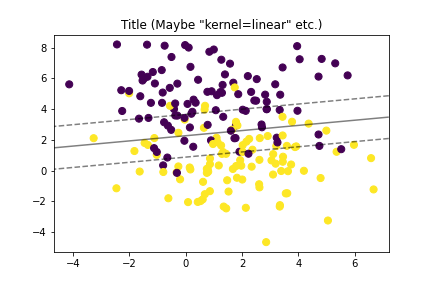

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

In [96]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=2)

### Note: I will try to give an observation for every question. My observation is located after the figure.

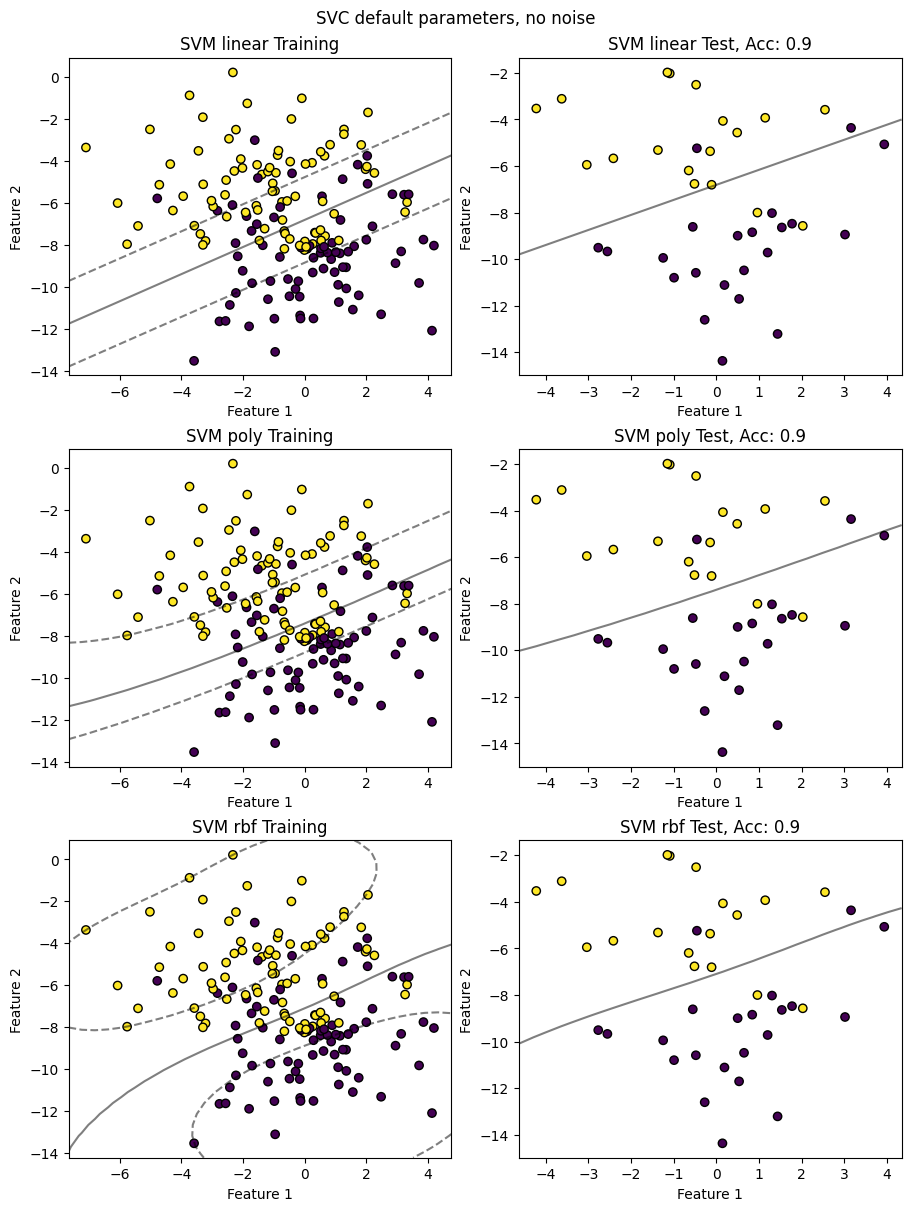

In [97]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#types of kernel
kernel = ['linear', 'poly', 'rbf']

#figure
fig, ax = plt.subplots(3, 2, figsize= (9,12 ), constrained_layout=True)
fig.suptitle('SVC default parameters, no noise')

for i in range(0,3):
    #hyperparameters are left set to default
    SVM = SVC(kernel=kernel[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM {} Training'.format(kernel[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM {} Test, Acc: {}'.format(kernel[i], acc))

plt.show()

##### <u>Observation</u>
- The boundary line for Poly and RBF is no longer just a straight line. But I guess it make sense because these two kernel calculate the boundary line in a higher dimension. 
- The hyperplanes for RBF is more "curvy" than poly. This is probably because RBF try to capture the relationship of the sample in infinite dimension while Poly is just in 3 dimensional space (the default value of the degree parameter in SVC is 3)


In [98]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=seed)

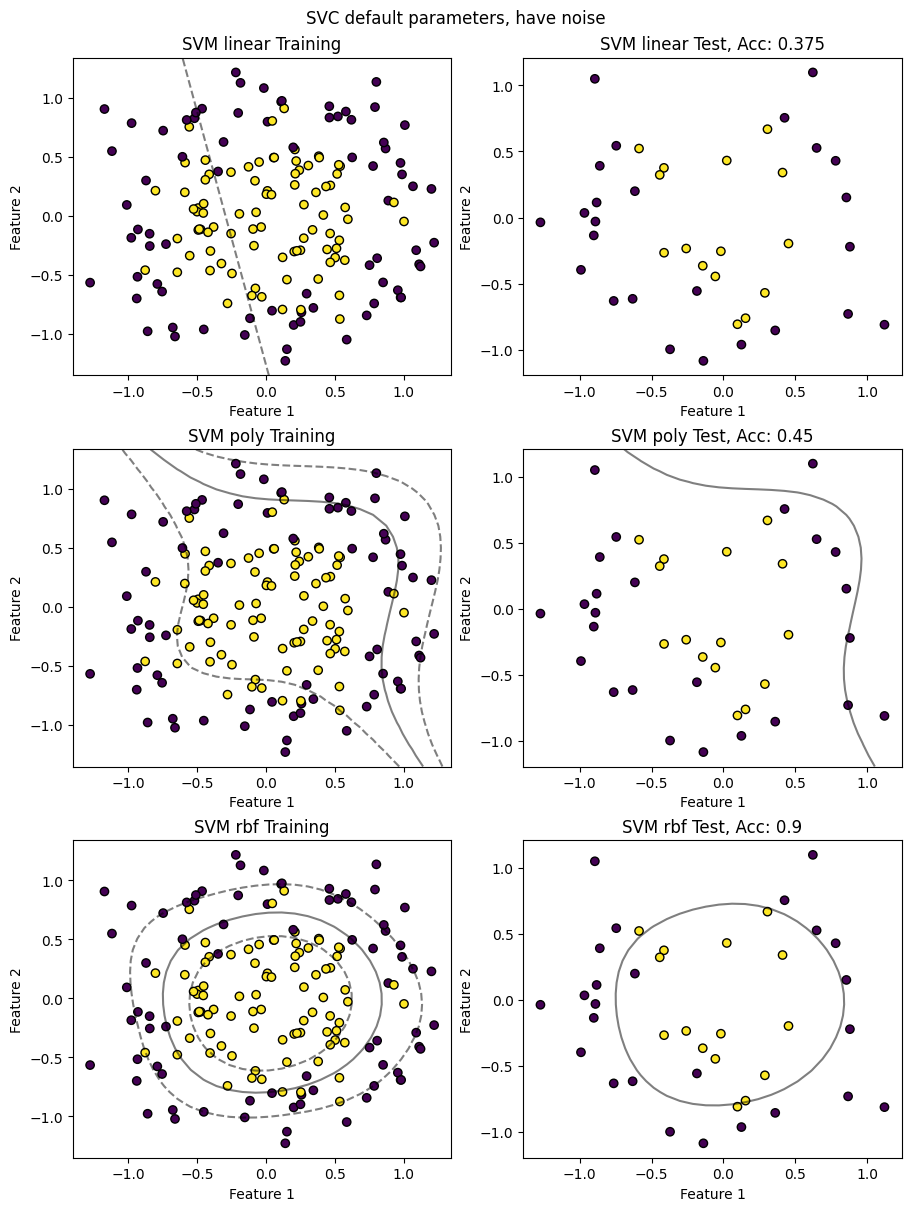

In [99]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#types of kernel
kernel = ['linear', 'poly', 'rbf']

#figure
fig, ax = plt.subplots(3, 2, figsize= (9,12 ), constrained_layout=True)
fig.suptitle('SVC default parameters, have noise')

for i in range(0,3):
    #hyperparameters are left set to default
    SVM = SVC(kernel=kernel[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM {} Training'.format(kernel[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM {} Test, Acc: {}'.format(kernel[i], acc))

##### <u>Observation</u>
- The samples this time around have noise. It seems that the "yellow" samples are mainly distributed in the center, while the "purple" samples are distributed on the parameter of the yellow samples. There is no line that can clearly seperate this two class. As a result, linear perform poorly (with acc of 0.375)
- Poly performs better than linear as it allows the samples to be captured in 3 dimensional space. The decision boundary is no longer just a straight line (when viewed on 2d plane)
- RBF performs the best, with an accuracy of 0.9. RBF is able to beat poly because RBF is basically a poly kernel, but with infinite dimension. This allows RBF to be able to make a more complex boundary decision than poly.

##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.1 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

In [100]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=0.5)

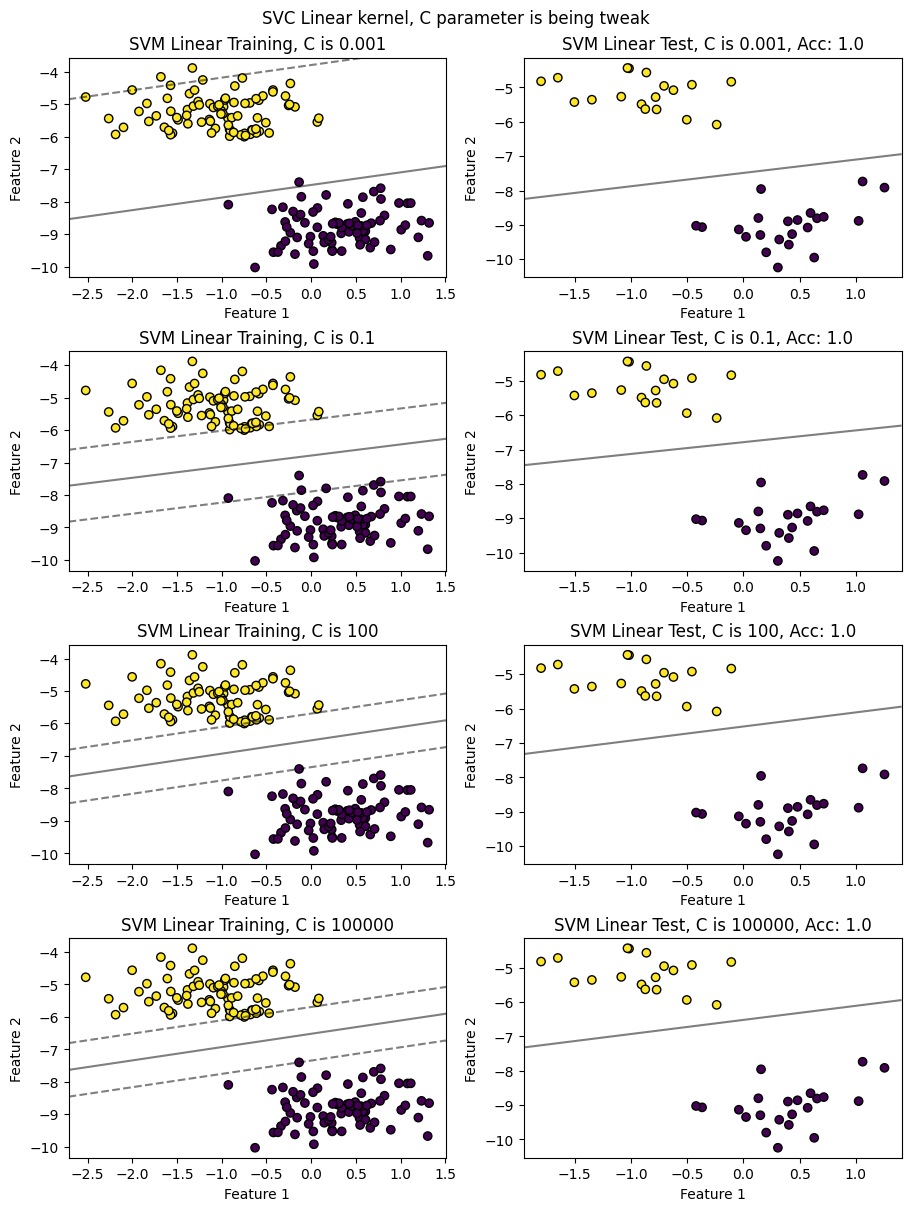

In [101]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

C = [0.001,0.1, 100, 100000]

#figure
fig, ax = plt.subplots(4, 2, figsize= (9,12 ), constrained_layout=True)
fig.suptitle('SVC Linear kernel, C parameter is being tweak')

for i in range(0, len(C)):
    #C is a regularization parameter in which higher C means less regularization
    SVM = SVC(kernel='linear', C = C[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM Linear Training, C is {}'.format(C[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM Linear Test, C is {}, Acc: {}'.format(C[i], acc))

##### <u>Observation</u>
- Higher C means less regularization. This means that more misclassified samples are allowed when C is low.
- Unfortunately, the data samples here are very nice and not noisy at all. So it is hard to see the affect of C in this data samples.
- However, I believe if the data is noisy, it is important to find the best C to prevent overfitting.

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 20*** at least, and you can try more values of ***degree*** to prove your observation. (5%)

In [102]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed)

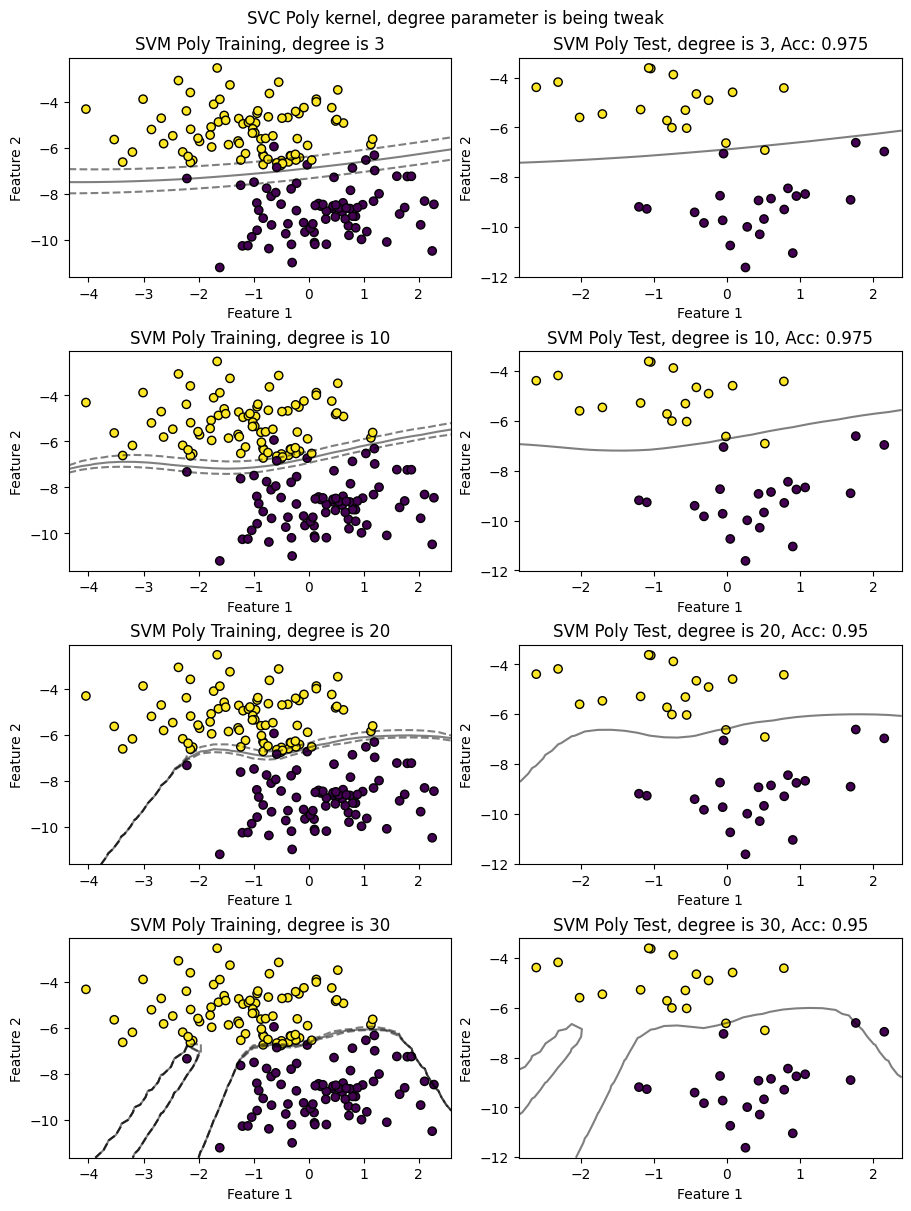

In [103]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

degree = [3, 10, 20, 30]

#figure
fig, ax = plt.subplots(len(degree), 2, figsize= (9,12 ), constrained_layout=True)
fig.suptitle('SVC Poly kernel, degree parameter is being tweak')

for i in range(0, len(degree)):
    SVM = SVC(kernel='poly', degree = degree[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM Poly Training, degree is {}'.format(degree[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM Poly Test, degree is {}, Acc: {}'.format(degree[i], acc))

##### <u>Observation</u>
- From the figure above, we can see that overfitting is occuring as the number of degree increases. In the last plot (degree=30), the purple sample on the left has its own boundary line.
- Since the affect of overfitting is worse as the number of degrees goes up, naturally the accuracy for the testing drop as well. (from 0.975 -> 0.95)

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 15*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

In [104]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=seed)

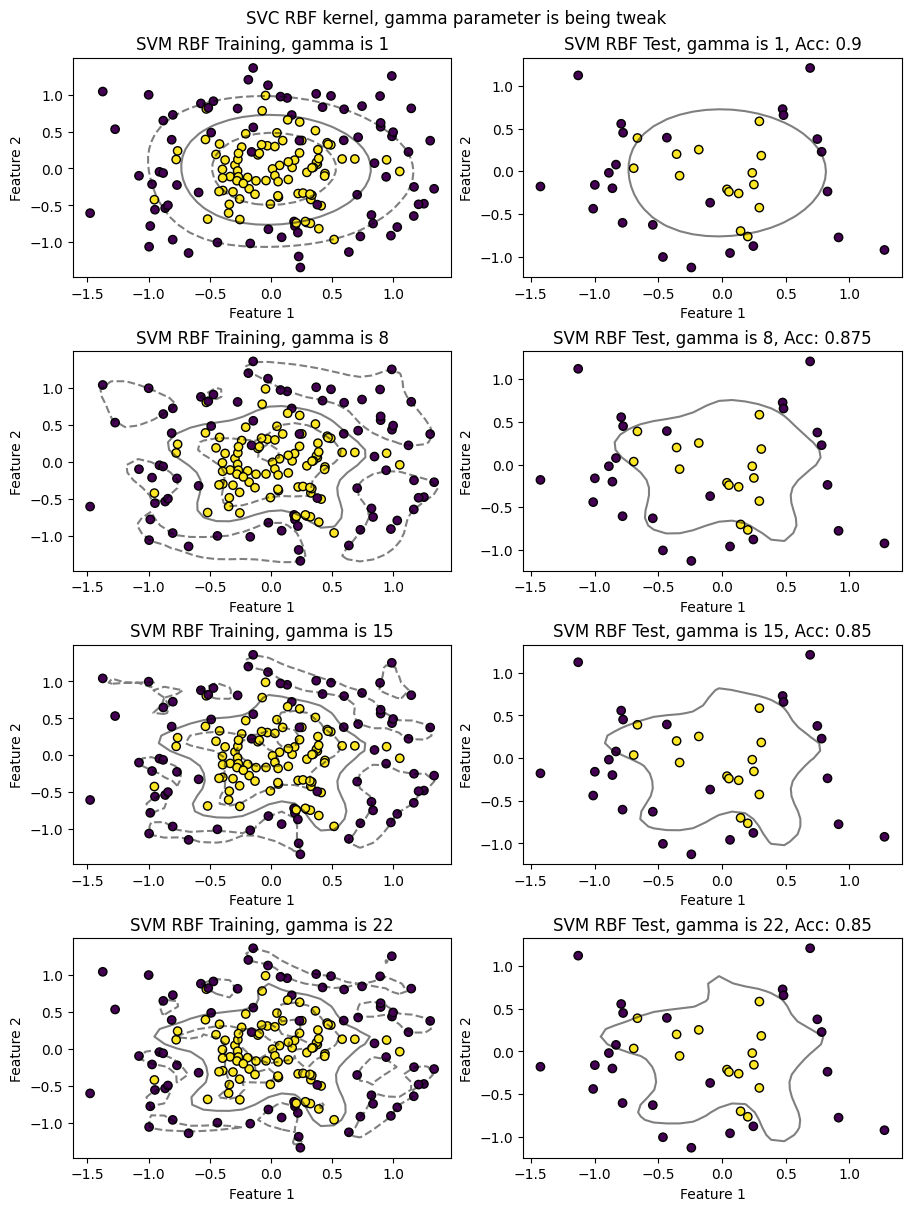

In [105]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

gamma = [1, 8, 15, 22]

#figure
fig, ax = plt.subplots(len(gamma), 2, figsize= (9,12 ), constrained_layout=True)
fig.suptitle('SVC RBF kernel, gamma parameter is being tweak')

for i in range(0, len(gamma)):
    SVM = SVC(kernel='rbf', gamma = gamma[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM RBF Training, gamma is {}'.format(gamma[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM RBF Test, gamma is {}, Acc: {}'.format(gamma[i], acc))

##### <u>Observation</u>
- It is seen that when the gamma is low, the decision boundary is smooth (when gamma is one, the boundary is like a circle). As number of gamma increases, it becomes more complex.
- The accuracy drop from 0.9 to 0.85 when the number of gamma change from 1 to 8. I believe overfitting is happening here as well.

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the hyperplane, support vector and margin and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the figure example:
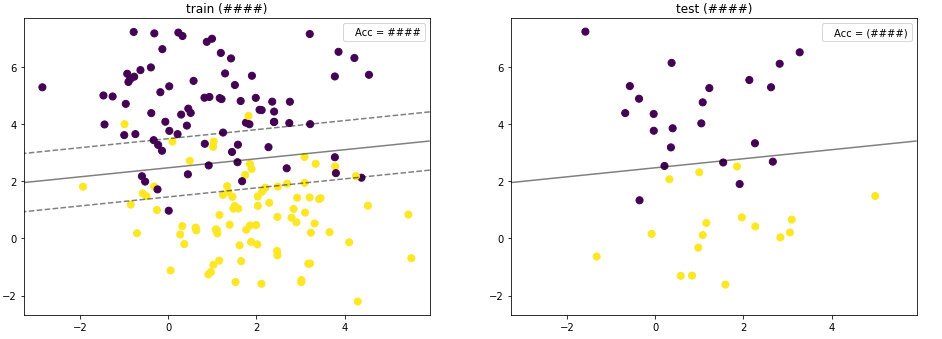

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

In [106]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.3)

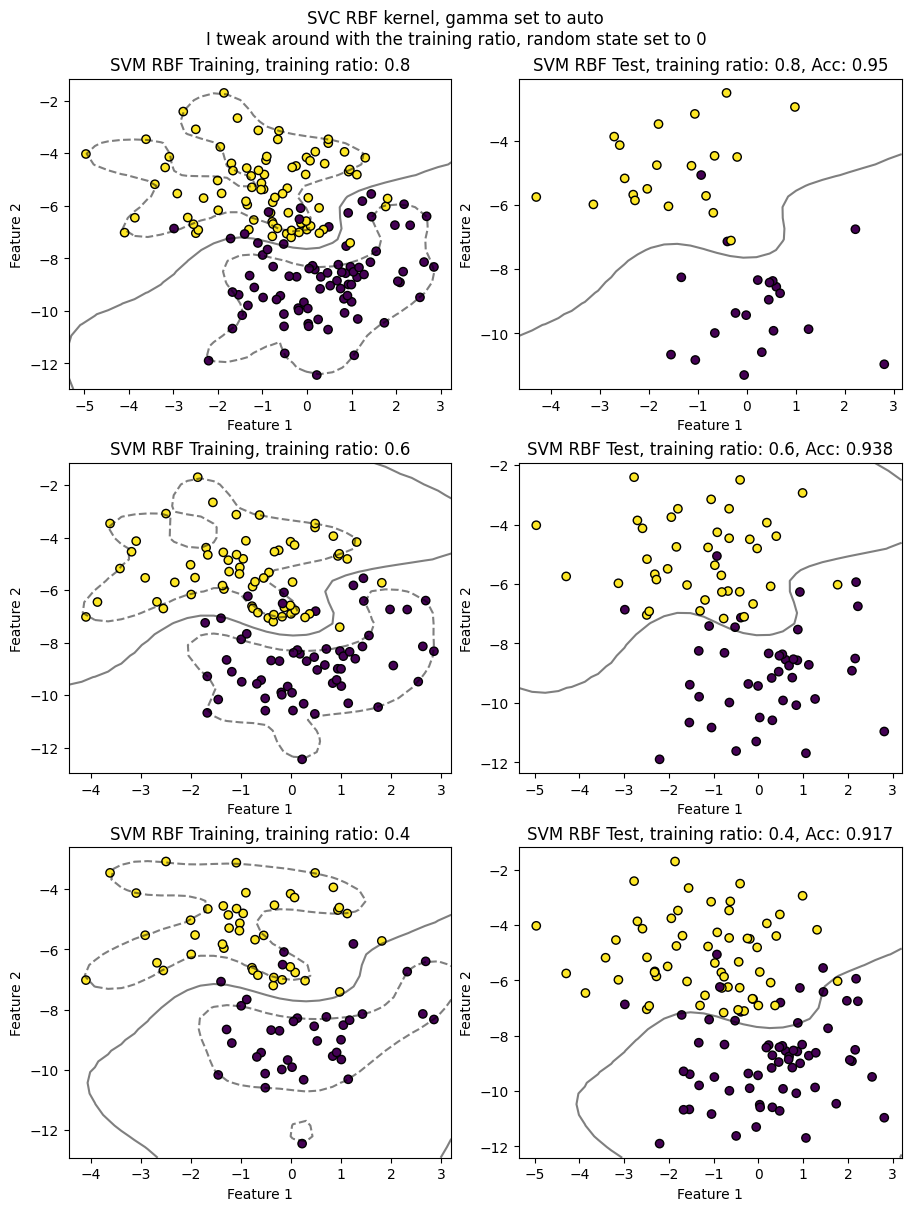

In [107]:
#the prof ask us to discuss the impact of training ratio, so I tried messing around with the training ratio
training_ratio = [0.8, 0.6, 0.4]

#figure
fig, ax = plt.subplots(len(training_ratio), 2, figsize= (9,12), constrained_layout=True)
fig.suptitle('SVC RBF kernel, gamma set to auto\nI tweak around with the training ratio, random state set to 0')

for i in range(0, len(training_ratio)):
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_ratio[i], random_state=0)

    SVM = SVC(kernel='rbf', gamma = 'auto')
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM RBF Training, training ratio: {}'.format(training_ratio[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM RBF Test, training ratio: {}, Acc: {}'.format(training_ratio[i], round(acc, 3)))

##### <u>Observation</u>
- I tried seeing the impact of training ratio by tweaking the training ratio. I specifically set it to 0.8, 0.6 and 0.4.
- As the training ratio decreases, the accuracy drops as well. There are two reasons why.
- The first reason is because there are less samples to use when fitting the model. (Resultting in higher bias. This can be seen in training ratio 0.4. The boundary decision becomes smoother)
- The second reason is because as the training ratio decreases, the number of testing samples increases.

##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

In [108]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

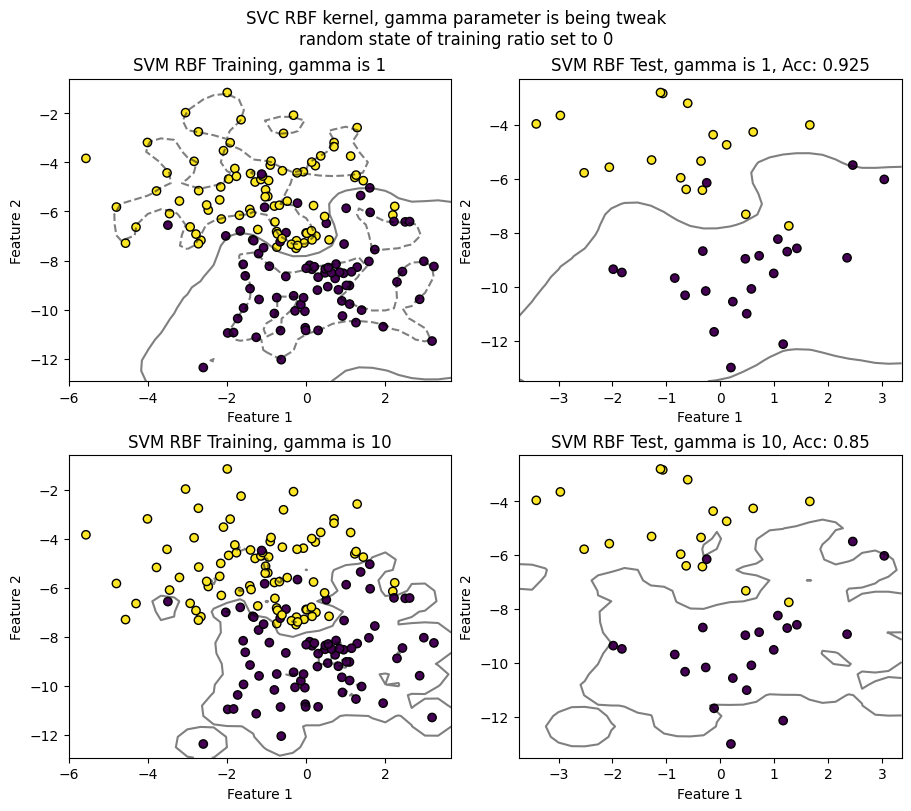

In [109]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

gamma = [1, 10]

#figure
fig, ax = plt.subplots(len(gamma), 2, figsize= (9,8 ), constrained_layout=True)
fig.suptitle('SVC RBF kernel, gamma parameter is being tweak\nrandom state of training ratio set to 0')

for i in range(0, len(gamma)):
    SVM = SVC(kernel='rbf', gamma = gamma[i])
    # --- training ----
    SVM.fit(X_train, y_train)

    #scatter plot (training)
    ax[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 0], mode='train')

    #just some labels
    ax[i, 0].set_xlabel('Feature 1')
    ax[i, 0].set_ylabel('Feature 2')
    ax[i, 0].set_title('SVM RBF Training, gamma is {}'.format(gamma[i]))

    # --- testing ---
    y_pred = SVM.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    #scatter plot (testing)
    #Note: What is being plotted is not the predicted output, but the groud truth output
    ax[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

    #use the function to display the hyperplane
    plot_svc_decision_function(SVM, ax=ax[i, 1], mode='test')

    #just some labels
    ax[i, 1].set_xlabel('Feature 1')
    ax[i, 1].set_ylabel('Feature 2')
    ax[i, 1].set_title('SVM RBF Test, gamma is {}, Acc: {}'.format(gamma[i], acc))

##### <u>Observation</u>
- Just like before, overfitting is happening here. As the gamma increases from 1 to 10, the decision boundary become more complex and fit the training samples too well. This can be seen on the figure above. When the gamma is 10, there is a boundary circle covering just one sample (referring to the sample on point (-4, -7) and (-3, -12)).
- As a result, the model with gamma 10 can't perform that well on the unseen data (Testing data), resulting the accuracy to be only 0.85.

##### 2.3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. (10%)

(You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)

| | 01 | 02 | 03 |
|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | poly |
|***degree***| 3 | 5 | - |
|***C***| 0.1 | 1 | 10|
|***gamma***| 1 | 0.1 | 0.01|

In [110]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

Text(0.5, 1.0, 'SVM Testing with GridSearch, Testing Acc: 0.925')

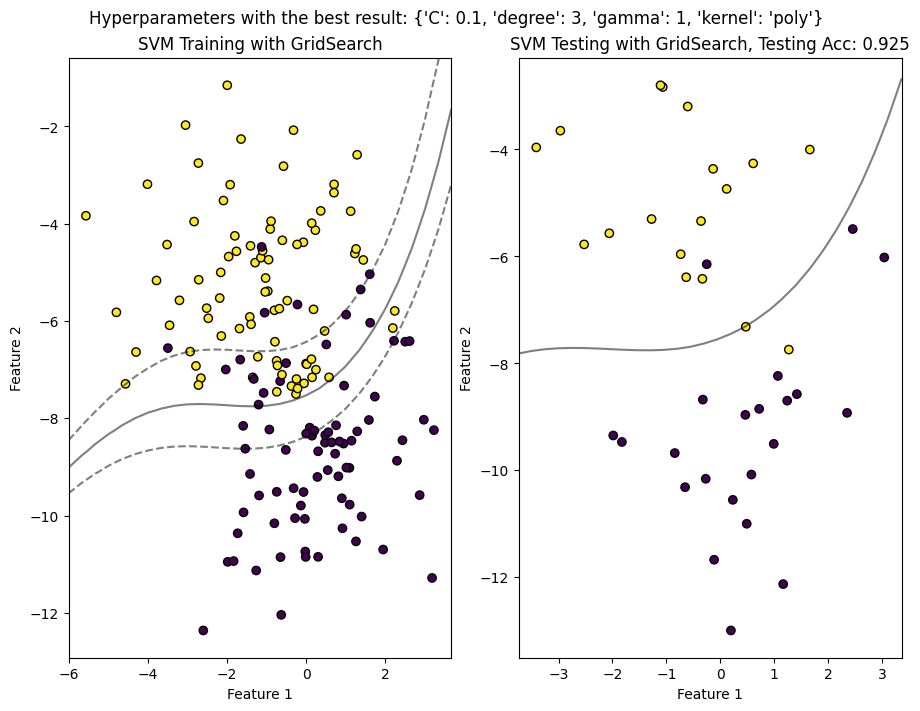

In [111]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


#for hyperparameter tuning
hyperparameter = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10] }, 
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [3, 5], 'gamma': [1,0.1,0.01]}, 
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [1,0.1,0.01]}
]


SVM = SVC()
#cross validation =2 
grid_search = GridSearchCV(estimator = SVM, param_grid=hyperparameter, scoring = 'accuracy', cv = 2)
grid_search.fit(X_train, y_train)
#best model is now saved in grid_search

fig, ax = plt.subplots(1, 2, figsize= (9,7), constrained_layout=True)

#scatter plot (training)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='black')

#use the function to display the hyperplane
plot_svc_decision_function(grid_search, ax=ax[0], mode='train')

#just some labels
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('SVM Training with GridSearch')

# --- testing ---
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)

#scatter plot (testing)
#Note: What is being plotted is not the predicted output, but the groud truth output
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='black')

#use the function to display the hyperplane
plot_svc_decision_function(grid_search, ax=ax[1], mode='test')

#just some labels
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
fig.suptitle('Hyperparameters with the best result: {}'.format(grid_search.best_params_))

ax[1].set_title('SVM Testing with GridSearch, Testing Acc: {}'.format(round(acc, 3)))



##### <u>Observation</u>
- I find GridSearchCV function to be very efficient at finding the best parameter (very easy to setup).
- I tried messing around with the CV. I tried with CV 2 and 4. Running with 4 CV makes the execution time to be around 6 minutes. Running with 2 CV only takes 1 min 49 seconds.
- Changing the CV can influence the final parameters. When I tried running with 4 CV, the best parameter is "kernel: rbf, C:1, gamma: 1". However, if I run with 2 CV, the best parameter is "kernel: poly, C: 0.1, degree:3, gamma: 1".
- I think the above can happen because with a higher value of CV, the training set will be bigger (training ratio will be bigger than validating ratio). Therefore, the number of CV can influence the variance and bias of a model.

### 3. Fitting the SVM by the real data. (40%)
#### This question will fit the SVM with real raw data. Please load the file "banana_quality.csv" with pandas package. Try the technique above to reach the highest score.

**\* Please note that the 'Quality' column is the classification label, please convert it to binary labels on your own.**

**Data sources: https://www.kaggle.com/datasets/l3llff/banana**

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling. (10%)

##### Here is the example of figure:

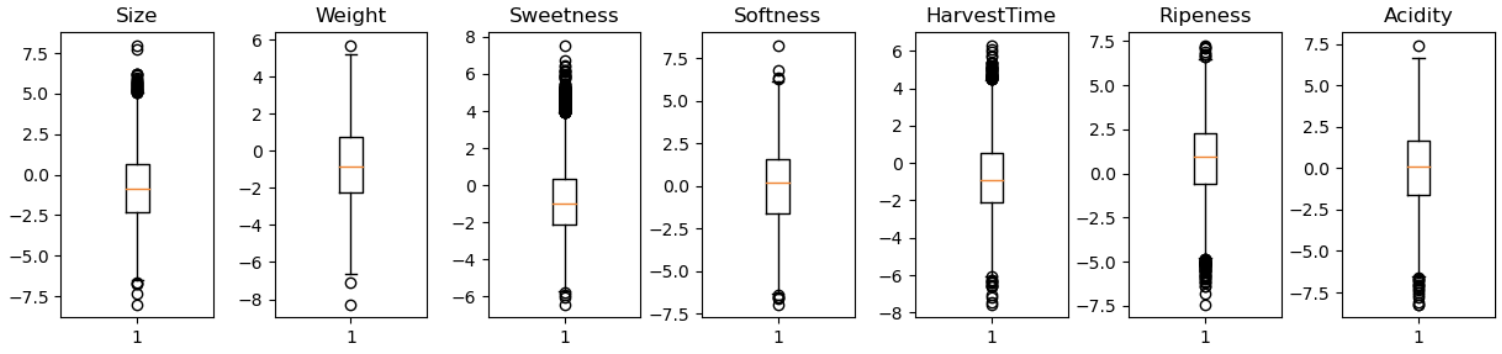


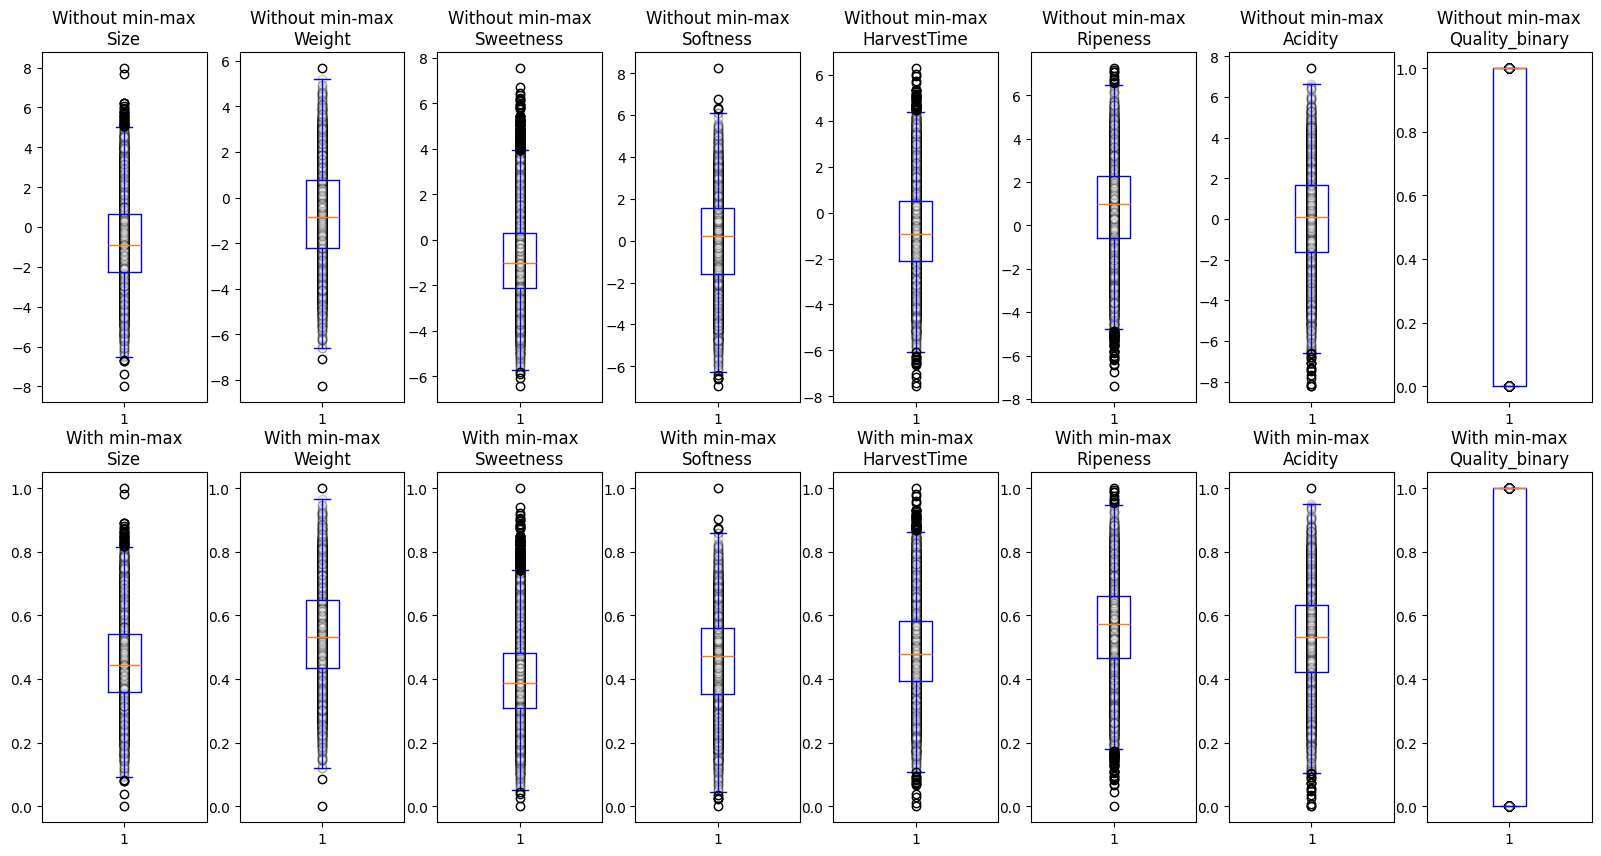

In [112]:
df = pd.read_csv('banana_quality.csv')

#covert Quality column into binary labels
df['Quality_binary'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)
df.drop('Quality', axis = 1, inplace=True)

fig, ax = plt.subplots(2, len(df.columns), figsize= (20, 10))

#for x_axis
x_axis = np.ones(df.shape[0])
for i, col in enumerate(df.columns):
     ax[0, i].scatter(x_axis, df[col], edgecolors = 'black', c='white', alpha=0.2)
     ax[0, i].boxplot(df[col], widths= 0.2, boxprops=dict(color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
     ax[0, i].set_title('Without min-max\n{}'.format(col))

#applying min max scaling
scaler = MinMaxScaler()
#learn the scaling parameter and apply it to the training set
scale_df = scaler.fit_transform(df)

for i, col in enumerate(df.columns):
     ax[1, i].scatter(x_axis, scale_df[:,i], edgecolors = 'black', c='white', alpha=0.2)
     ax[1, i].boxplot(scale_df[:,i], widths= 0.2, boxprops=dict(color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
     ax[1, i].set_title('With min-max\n{}'.format(col))


##### <u>Observation</u>
- After the min-max is applied, all the features have a min of 0 and a max of 1. This can be clearly seen on the figure above.
- After applying min-max scaling, the distribution of the samples is still the same.

##### 3-2  Please split the data with traing ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold) (20%)

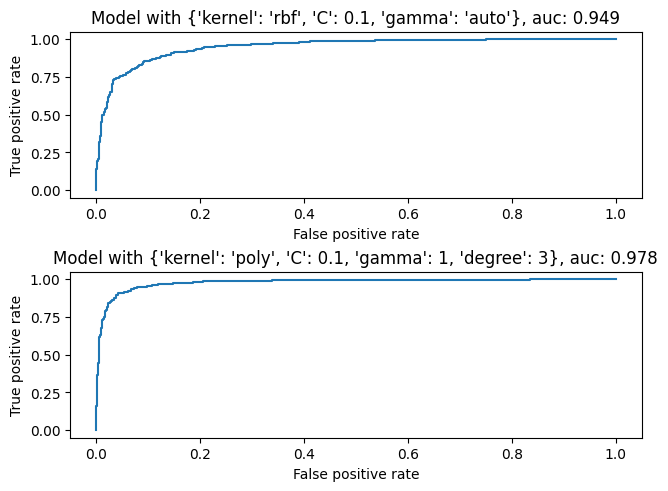

In [113]:
#seperate the label data to X and y
y = scale_df[:, len(df.columns)-1]
X = scale_df[:, :len(df.columns)-1]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#figures stuff
fig, ax = plt.subplots(2, 1, constrained_layout=True)

#first model
#hyperparameter: {'kernel':'rbf', 'C':0.1, 'gamma':10}
#second model
#hyperparameter: {'kernel':'poly','C':0.1, 'gamma':1, 'degree':3}

model_param =[
    {'kernel':'rbf', 'C':0.1, 'gamma':'auto'}, #first model
    {'kernel':'poly', 'C':0.1, 'gamma':1, 'degree':3} #second model
]

for i, param in enumerate(model_param):

    SVM = SVC(**param, probability=True)
    SVM.fit(X_train, y_train)

    #I dont use the predict function, but instead use decision_function() to get the signed distances from the boundary instead
    y_distance = SVM.decision_function(X_test)
  
    #ROC curve
    fpr,tpr, thresholds = roc_curve(y_test, y_distance)

    auc = roc_auc_score(y_test,  y_distance)
    
    ax[i].plot(fpr, tpr)
    ax[i].set_xlabel('False positive rate')
    ax[i].set_ylabel('True positive rate')

    ax[i].set_title('Model with {}, auc: {:.3f}'.format(param, auc))

##### <u>Observation</u>
- the auc of the second model (poly kernel) is higher than the auc of the first model (rbf kernel)
- therefore, the second model perform better. So I will use that as the best parameters.

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

The second model (poly) is better.
I will be calculating based on the second model result
Threshold is set to 0
Accuracy 0.928
Precision 0.938
Recall 0.918
F1-score 0.928


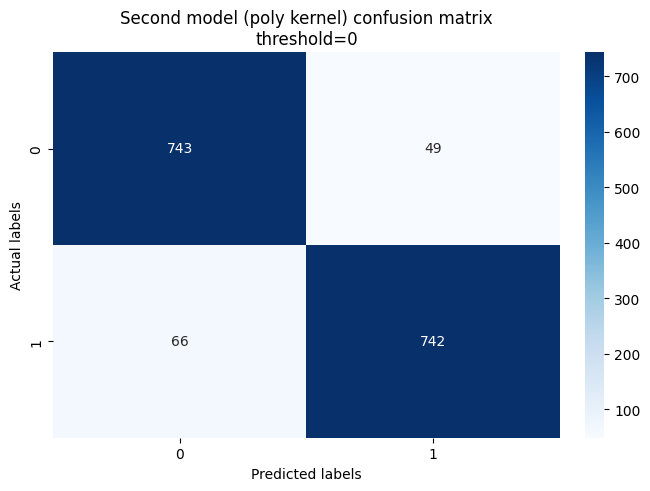

In [114]:
print("The second model (poly) is better.\nI will be calculating based on the second model result\nThreshold is set to 0")

#I will be picking threshold = 0 because I mess around with various threshold and find this threshold to give a good balance between all 4 (precision, recall, accuracy and F1-score)

y_after_threshold = np.where(y_distance > 0, 1, 0)
#confusion matrix
matrix = confusion_matrix(y_test, y_after_threshold)

#display the confusion matrix
plt.figure(constrained_layout=True) 
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Second model (poly kernel) confusion matrix\nthreshold=0')

#acc
print("Accuracy", round(accuracy_score(y_test, y_after_threshold),3))
#precision: TP/(TP+FP)
precision = matrix[1,1]/(matrix[1,1]+matrix[0,1])
print("Precision",round(precision,3))
#recall: TP/(TP+FN), basically TPR
recall = matrix[1,1]/(matrix[1,1]+matrix[1,0])
print("Recall", round(recall,3))
#f1-score: 2 * (precision x recall)/(precision + recall)
f1_score = 2 * (precision * recall)/(precision+recall)
print("F1-score", round(f1_score,3))
